[back](./00-index.ipynb)

---

### `Initial Setup`

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns  # Library used to print nicer charts and visualizations
import matplotlib.pyplot as plt

%matplotlib inline


refer [here](https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline) to know about `%matplotlib inline`

In [2]:
df = pd.read_csv(r'../../assets/single_family_home_values.csv')
df.head(4)


,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.84916,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
1,184578398,10556 Wheeling St,Denver,CO,80022,39.88802,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.76171,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaN,NaN,488840
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.76078,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073


### `Cleaning Data`

#### `Understanding the DataFrame`

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
# Shape of the DataFrame
# Prints the number of rows and columns
df.shape

(15000, 18)

In [5]:
# Info of the DataFrame
# Can know the number of missing values for each column
# Can understand the data-type of the elements in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         14985 non-null  float64
 6   longitude        14985 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        14999 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  11287 non-null  float64
 17  estimated_va

In [6]:
# Have statistics of the DataFrame
df.describe()

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
count,1.500000e+04,15000.000000,14985.000000,14985.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,14999.000000,1.500000e+04,1.128700e+04,1.500000e+04
mean,5.176229e+07,80204.919467,39.740538,-104.964076,2.708400,2.195067,6.164133,1514.504400,5820.76620,1929.517168,4.053563e+05,2.594350e+05,6.371625e+05
std,6.190876e+07,9.715263,0.023555,0.039788,0.897231,1.166279,1.958601,830.635999,3013.27947,29.937051,7.756998e+05,3.379387e+05,5.044185e+05
min,1.433670e+05,80022.000000,39.614531,-105.108440,0.000000,0.000000,0.000000,350.000000,278.00000,1874.000000,2.590000e+02,0.000000e+00,1.477670e+05
25%,1.004802e+07,80205.000000,39.727634,-104.978737,2.000000,1.000000,5.000000,986.000000,4620.00000,1907.000000,1.940000e+05,1.100000e+05,3.984348e+05
50%,2.563241e+07,80206.000000,39.748048,-104.957689,3.000000,2.000000,6.000000,1267.500000,5950.00000,1925.000000,3.200000e+05,2.100000e+05,5.183575e+05
75%,5.114222e+07,80207.000000,39.758214,-104.937522,3.000000,3.000000,7.000000,1766.250000,6270.00000,1949.000000,4.632000e+05,3.302400e+05,6.879692e+05
max,3.209481e+08,80209.000000,39.888020,-104.830930,15.000000,12.000000,39.000000,10907.000000,122839.00000,2016.000000,4.560000e+07,1.600000e+07,1.014531e+07


In [7]:
# Fill NaN values
df2 = df.fillna(0)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         15000 non-null  float64
 6   longitude        15000 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        15000 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    15000 non-null  object 
 16  priorSaleAmount  15000 non-null  float64
 17  estimated_va

In [8]:
# Instead of filling with 0, we might want to fill it with the mean of each column
df3 = df.fillna(df.mean())
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         15000 non-null  float64
 6   longitude        15000 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        15000 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  15000 non-null  float64
 17  estimated_va

/Users/goutham/opt/anaconda3/envs/learning/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [9]:
# Drop all NaN values
# df = df.dropna() # Drop NaN values and assign it back to df

# Another way of doing the same
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11078 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               11078 non-null  int64  
 1   address          11078 non-null  object 
 2   city             11078 non-null  object 
 3   state            11078 non-null  object 
 4   zipcode          11078 non-null  int64  
 5   latitude         11078 non-null  float64
 6   longitude        11078 non-null  float64
 7   bedrooms         11078 non-null  int64  
 8   bathrooms        11078 non-null  float64
 9   rooms            11078 non-null  int64  
 10  squareFootage    11078 non-null  int64  
 11  lotSize          11078 non-null  int64  
 12  yearBuilt        11078 non-null  float64
 13  lastSaleDate     11078 non-null  object 
 14  lastSaleAmount   11078 non-null  int64  
 15  priorSaleDate    11078 non-null  object 
 16  priorSaleAmount  11078 non-null  float64
 17  estimated_va

#### `Understanding the DataFrame - More`

<AxesSubplot:xlabel='estimated_value'>

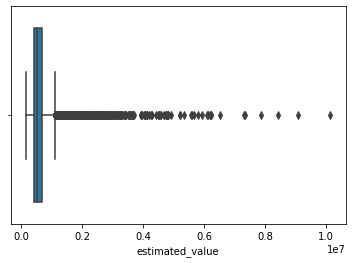

In [10]:
# Knowing the outliers
sns.boxplot(x=df.estimated_value)


We see that there are some outliers and we can try and remove values those are **> 800000** _(because the value is actually 1e7)_ to remove some of the outliers in the DataFrame

In [11]:
# Trying to eliminate the outliers

df[df.estimated_value <= 800000].shape

(9456, 18)

<AxesSubplot:xlabel='estimated_value'>

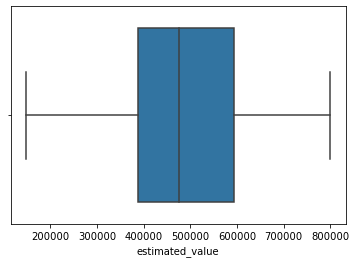

In [12]:
sns.boxplot(x=df[df.estimated_value <= 800000].estimated_value)


We will set **1000000** as a cutoff and use it as the limit to eliminate the outliers

In [13]:
df = df[df.estimated_value <= 1000000]
df.shape

(10080, 18)

<AxesSubplot:xlabel='estimated_value'>

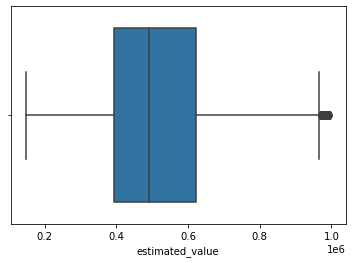

In [14]:
sns.boxplot(x=df.estimated_value)

<AxesSubplot:>

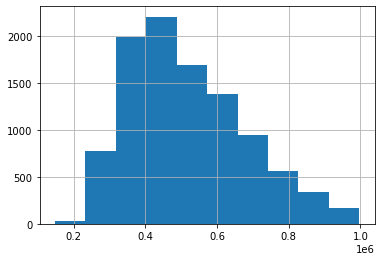

In [15]:
df.estimated_value.hist()

#### `Filtering out noise`

In [16]:
# Get data to help using for filtering
df.zipcode.unique()

array([80022, 80033, 80123, 80203, 80204, 80205, 80206, 80207, 80209])

In [17]:
# Format to filter / slice data, with multiple conditions
# df[(df.estimated_value<=1000000) & (cond2) & (cond3)]
# df[((df.estimated_value <= 1000000) | (df.yearBuilt > 2000)) & (df.zipcode == 80209)]

df[(df.estimated_value <= 1000000) & (df.yearBuilt > 2000) & (df.zipcode == 80209)]


,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
13276,39512040,764 S York St,Denver,CO,80209,39.702607,-104.960243,3,4.0,7,2567,6250,2016.0,2012-07-23,420000,2010-11-29,385000.0,770622
13316,11586398,450 S Vine St,Denver,CO,80209,39.708351,-104.962546,3,5.0,7,2570,4680,2016.0,2015-02-11,571000,2007-01-03,399000.0,682810
13428,11586742,636 S Williams St,Denver,CO,80209,39.704969,-104.966025,3,5.0,6,2578,4680,2016.0,2015-07-22,637600,2007-02-02,481900.0,745777
13431,184305844,456 S High St,Denver,CO,80209,39.708197,-104.964857,3,5.0,10,3346,6240,2016.0,2016-01-11,725000,1993-07-15,124000.0,751361
13766,7652681,408 S Franklin St,Denver,CO,80209,39.709074,-104.968369,3,5.0,8,3367,5060,2015.0,2014-04-21,513486,2007-08-22,435000.0,709102
13812,39708952,611 S Washington St,Denver,CO,80209,39.705403,-104.979580,3,4.0,10,2090,4690,2014.0,2015-03-09,825000,2013-07-19,325500.0,994114
13988,8771845,829 S Sherman St,Denver,CO,80209,39.701362,-104.985420,3,4.0,8,2359,4160,2008.0,2011-12-30,461000,2011-12-15,0.0,814991
14162,30566405,876 S Williams St,Denver,CO,80209,39.700646,-104.966016,3,1.0,8,3394,6250,2015.0,2014-03-18,675000,2006-05-11,511000.0,869769
14777,39896461,733 S Logan St,Denver,CO,80209,39.703268,-104.983132,4,4.0,7,2410,5108,2004.0,2012-08-10,600000,2012-01-18,300000.0,820893
14967,206263485,220 S Pennsylvania St,Denver,CO,80209,39.712480,-104.981430,1,3.0,5,1143,3882,2010.0,2015-09-04,725000,2010-10-20,450000.0,686395


### `Statistics`


---
[next]()